In [81]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [12]:
# Step 1: Load the dataset
# Replace 'covid_dataset.csv' with your file path
data = pd.read_csv('covid_dataset.csv')
print("Dataset loaded successfully!")
data

Dataset loaded successfully!


,Fever (°C),Dry Cough,Chest Pain,Headache,Fatigue,Sore Throat,Loss of Taste/Smell,Difficulty Breathing,Diarrhea,Muscle Pain,Travel History,Close Contact,Age,COVID-19 Positive (Yes/No)
0,39.4,0,0,1,1,0,0,0,1,0,0,1,2,Yes
1,38.8,0,1,0,1,1,0,0,1,1,1,0,66,No
2,39.8,1,0,1,1,1,0,0,0,1,1,1,75,Yes
3,37.8,0,1,0,0,1,0,1,0,0,0,0,51,No
4,37.8,0,0,0,1,1,0,0,1,1,0,1,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39.9,0,1,1,0,0,1,0,1,1,0,0,67,Yes
9996,38.7,1,0,1,0,1,0,0,1,1,1,0,78,Yes
9997,39.5,1,0,0,1,1,1,1,0,1,0,0,2,Yes
9998,39.1,1,1,1,1,1,1,1,1,0,1,0,20,Yes


In [13]:
data['COVID-19 Positive (Yes/No)'] = data['COVID-19 Positive (Yes/No)'].map({'Yes': 1, 'No': 0})
data

,Fever (°C),Dry Cough,Chest Pain,Headache,Fatigue,Sore Throat,Loss of Taste/Smell,Difficulty Breathing,Diarrhea,Muscle Pain,Travel History,Close Contact,Age,COVID-19 Positive (Yes/No)
0,39.4,0,0,1,1,0,0,0,1,0,0,1,2,1
1,38.8,0,1,0,1,1,0,0,1,1,1,0,66,0
2,39.8,1,0,1,1,1,0,0,0,1,1,1,75,1
3,37.8,0,1,0,0,1,0,1,0,0,0,0,51,0
4,37.8,0,0,0,1,1,0,0,1,1,0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39.9,0,1,1,0,0,1,0,1,1,0,0,67,1
9996,38.7,1,0,1,0,1,0,0,1,1,1,0,78,1
9997,39.5,1,0,0,1,1,1,1,0,1,0,0,2,1
9998,39.1,1,1,1,1,1,1,1,1,0,1,0,20,1


In [16]:
X = data.drop(columns=['COVID-19 Positive (Yes/No)'])
X

,Fever (°C),Dry Cough,Chest Pain,Headache,Fatigue,Sore Throat,Loss of Taste/Smell,Difficulty Breathing,Diarrhea,Muscle Pain,Travel History,Close Contact,Age
0,39.4,0,0,1,1,0,0,0,1,0,0,1,2
1,38.8,0,1,0,1,1,0,0,1,1,1,0,66
2,39.8,1,0,1,1,1,0,0,0,1,1,1,75
3,37.8,0,1,0,0,1,0,1,0,0,0,0,51
4,37.8,0,0,0,1,1,0,0,1,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39.9,0,1,1,0,0,1,0,1,1,0,0,67
9996,38.7,1,0,1,0,1,0,0,1,1,1,0,78
9997,39.5,1,0,0,1,1,1,1,0,1,0,0,2
9998,39.1,1,1,1,1,1,1,1,1,0,1,0,20


In [17]:
y = data['COVID-19 Positive (Yes/No)']
y

0       1
1       0
2       1
3       0
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: COVID-19 Positive (Yes/No), Length: 10000, dtype: int64

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

Data split into training and testing sets.


In [19]:
X_train

,Fever (°C),Dry Cough,Chest Pain,Headache,Fatigue,Sore Throat,Loss of Taste/Smell,Difficulty Breathing,Diarrhea,Muscle Pain,Travel History,Close Contact,Age
9254,37.5,0,0,0,1,0,1,0,0,0,0,1,91
1561,40.0,0,0,1,1,0,0,0,0,1,0,1,73
1670,39.9,0,0,0,0,0,1,0,1,1,1,0,41
6087,39.5,1,0,0,1,1,1,1,1,1,1,0,60
6669,36.6,0,0,1,0,0,0,1,1,0,1,0,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,39.5,1,0,0,1,1,1,1,0,0,0,1,92
5191,38.1,1,1,0,0,1,0,0,0,0,0,1,71
5390,37.2,1,1,1,0,1,1,1,1,0,1,1,36
860,38.1,0,1,1,1,1,1,1,0,0,1,0,31


In [20]:
X_test

,Fever (°C),Dry Cough,Chest Pain,Headache,Fatigue,Sore Throat,Loss of Taste/Smell,Difficulty Breathing,Diarrhea,Muscle Pain,Travel History,Close Contact,Age
6252,37.4,1,0,1,1,0,0,1,1,0,1,1,12
4684,36.8,1,1,1,1,1,0,1,1,1,1,0,58
1731,39.3,0,0,0,0,1,0,1,0,0,0,0,100
4742,39.6,0,0,0,0,0,1,0,1,1,1,1,27
4521,39.9,0,0,0,0,0,1,0,0,1,0,1,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,39.6,0,1,0,1,1,0,0,0,1,0,1,6
8285,38.3,1,0,0,0,0,0,0,1,0,0,0,84
7853,37.1,1,1,1,1,0,1,0,1,0,0,0,12
1095,38.2,1,1,0,0,0,1,1,1,0,1,1,39


In [21]:
y_train

9254    0
1561    1
1670    1
6087    1
6669    0
       ..
5734    1
5191    1
5390    0
860     1
7270    1
Name: COVID-19 Positive (Yes/No), Length: 8000, dtype: int64

In [22]:
y_test

6252    0
4684    0
1731    0
4742    1
4521    1
       ..
6412    1
8285    1
7853    0
1095    1
6929    1
Name: COVID-19 Positive (Yes/No), Length: 2000, dtype: int64

In [45]:
# Step 3: Initialize Models
nb_model = GaussianNB()
svm_model = SVC(kernel='linear', random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

In [46]:
nb_model

GaussianNB()

In [48]:
svm_model

SVC(kernel='linear', random_state=42)

In [49]:
knn_model

KNeighborsClassifier()

In [50]:
# Step 4: Train Models
nb_model.fit(X_train, y_train)
print("Naive Bayes model trained.")

Naive Bayes model trained.


In [51]:
svm_model.fit(X_train, y_train)
print("Decision Tree model trained.")

Decision Tree model trained.


In [52]:
knn_model.fit(X_train, y_train)
print("K-Nearest Neighbors model trained.")

K-Nearest Neighbors model trained.


In [53]:
# Step 5: Make Predictions
nb_predictions = nb_model.predict(X_test)

In [54]:
nb_predictions

array([0, 0, 1, ..., 0, 1, 1])

In [55]:
nb_accuracy = accuracy_score(y_test, nb_predictions)

In [56]:
nb_accuracy

0.879

In [58]:
svm_predictions = dt_model.predict(X_test)

In [60]:
svm_predictions

array([0, 0, 0, ..., 0, 1, 1])

In [62]:
svm_accuracy = accuracy_score(y_test, svm_predictions)

In [63]:
svm_accuracy

1.0

In [64]:
knn_predictions = knn_model.predict(X_test)

In [65]:
knn_predictions

array([0, 0, 1, ..., 1, 1, 1])

In [66]:
knn_accuracy = accuracy_score(y_test, knn_predictions)

In [67]:
knn_accuracy

0.8865

In [68]:
final_predictions = []
for i in range(len(X_test)):
    votes = [nb_predictions[i], svm_predictions[i], knn_predictions[i]]
    final_predictions.append(1 if votes.count(1) > votes.count(0) else 0)


Final Predictions based on Voting:
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 

In [69]:
voting_accuracy = accuracy_score(y_test, final_predictions)

In [70]:
voting_accuracy

0.949

In [73]:
# Confusion Matrix and Classification Report for Voting-Based Model
conf_matrix = confusion_matrix(y_test, final_predictions)
conf_matrix

array([[ 736,   73],
       [  29, 1162]])

In [76]:
class_report = classification_report(y_test, final_predictions)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       809
           1       0.94      0.98      0.96      1191

    accuracy                           0.95      2000
   macro avg       0.95      0.94      0.95      2000
weighted avg       0.95      0.95      0.95      2000



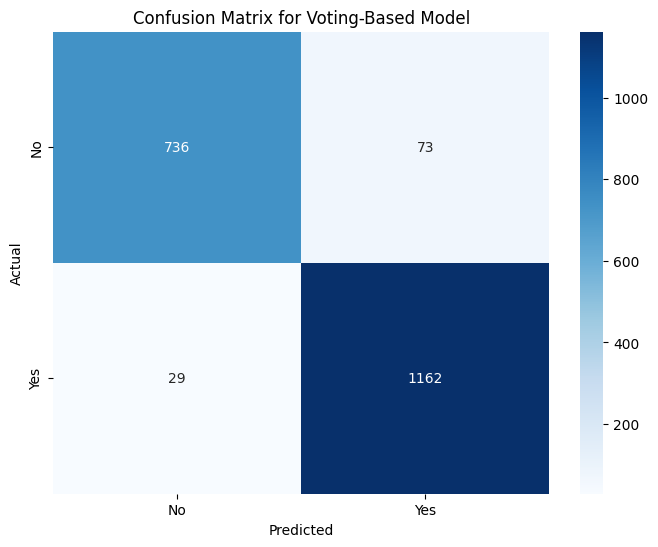

In [80]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Voting-Based Model')
plt.show()

In [82]:
# Save the models
with open('nb_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)
print("Models saved successfully.")

Models saved successfully.
